# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16468, 14)

we have 16468 rows and 14 columns.

AveragePrice is our target column in problem statement, we have to predict Average Price. 

This is a regression problem

In [6]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

ll features have float datatype except Date, region and type which are object data type.

year has a float data type we can convert it into int for model building.

# Data Cleaning

In [7]:
#checking for all the null values in the columns
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
df.isnull().sum().sum()

209314

In [9]:
df.dropna(axis=0, inplace=True)

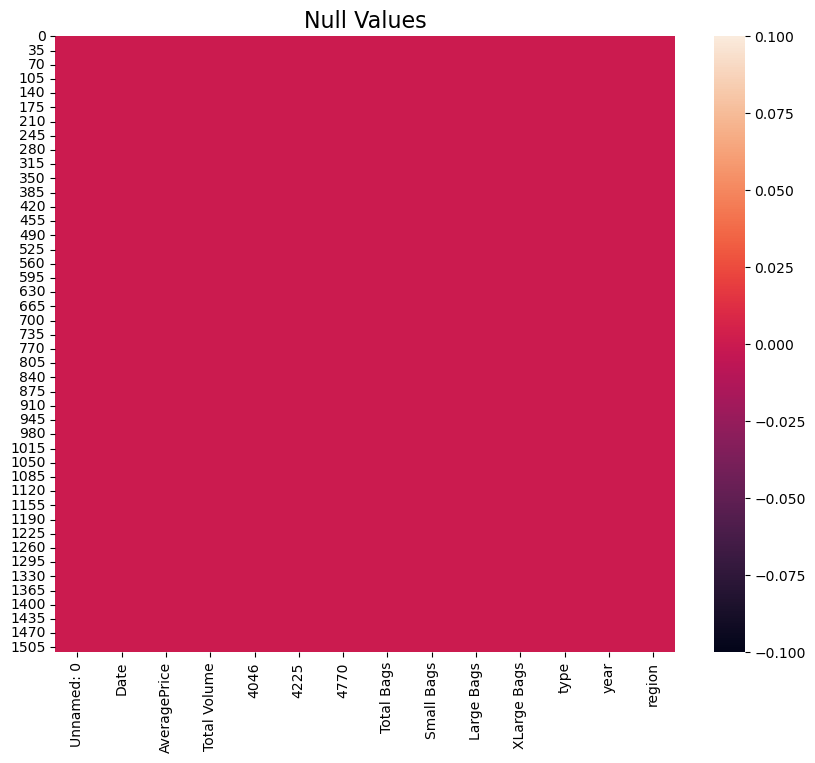

In [10]:
# ploting the heatmap to check null values
plt.figure(figsize=(10,8))
plt.title('Null Values',fontsize=16)
sns.heatmap(df.isnull());

In [11]:
# dropping the unnecessary col
df= df.drop(['Unnamed: 0'],axis=1)


In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


# Expolatory Data Analysis (EDA)

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000



From the provided summary statistics, we can draw below key takeaways:

The average price of avocados in this dataset ranges from 0.49 to 1.68, with a mean of approximately 1.07.

The prices seem to be relatively stable, with a small standard deviation of about 0.19.

The total volume of avocados sold varies significantly, ranging from approximately 38,750 to 44,655,460 units.

There's a large spread in the data, indicated by a high standard deviation relative to the mean.

The quartile values (25th, 50th, and 75th percentiles) provide insight into the distribution of the data, suggesting how it's spread out.

The presence of outliers can also be inferred from the large difference between the maximum value and the 75th percentile.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [16]:
df.shape

(1517, 13)

In [17]:
df.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [18]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [19]:
#renaming the columns for better understanding

df.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [20]:
df

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [21]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [22]:
df.type.unique()

array(['conventional'], dtype=object)

In [23]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

val=['type','region']
for i in val:
    df[i]=le.fit_transform(df[i])

In [25]:
df

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7


In [26]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

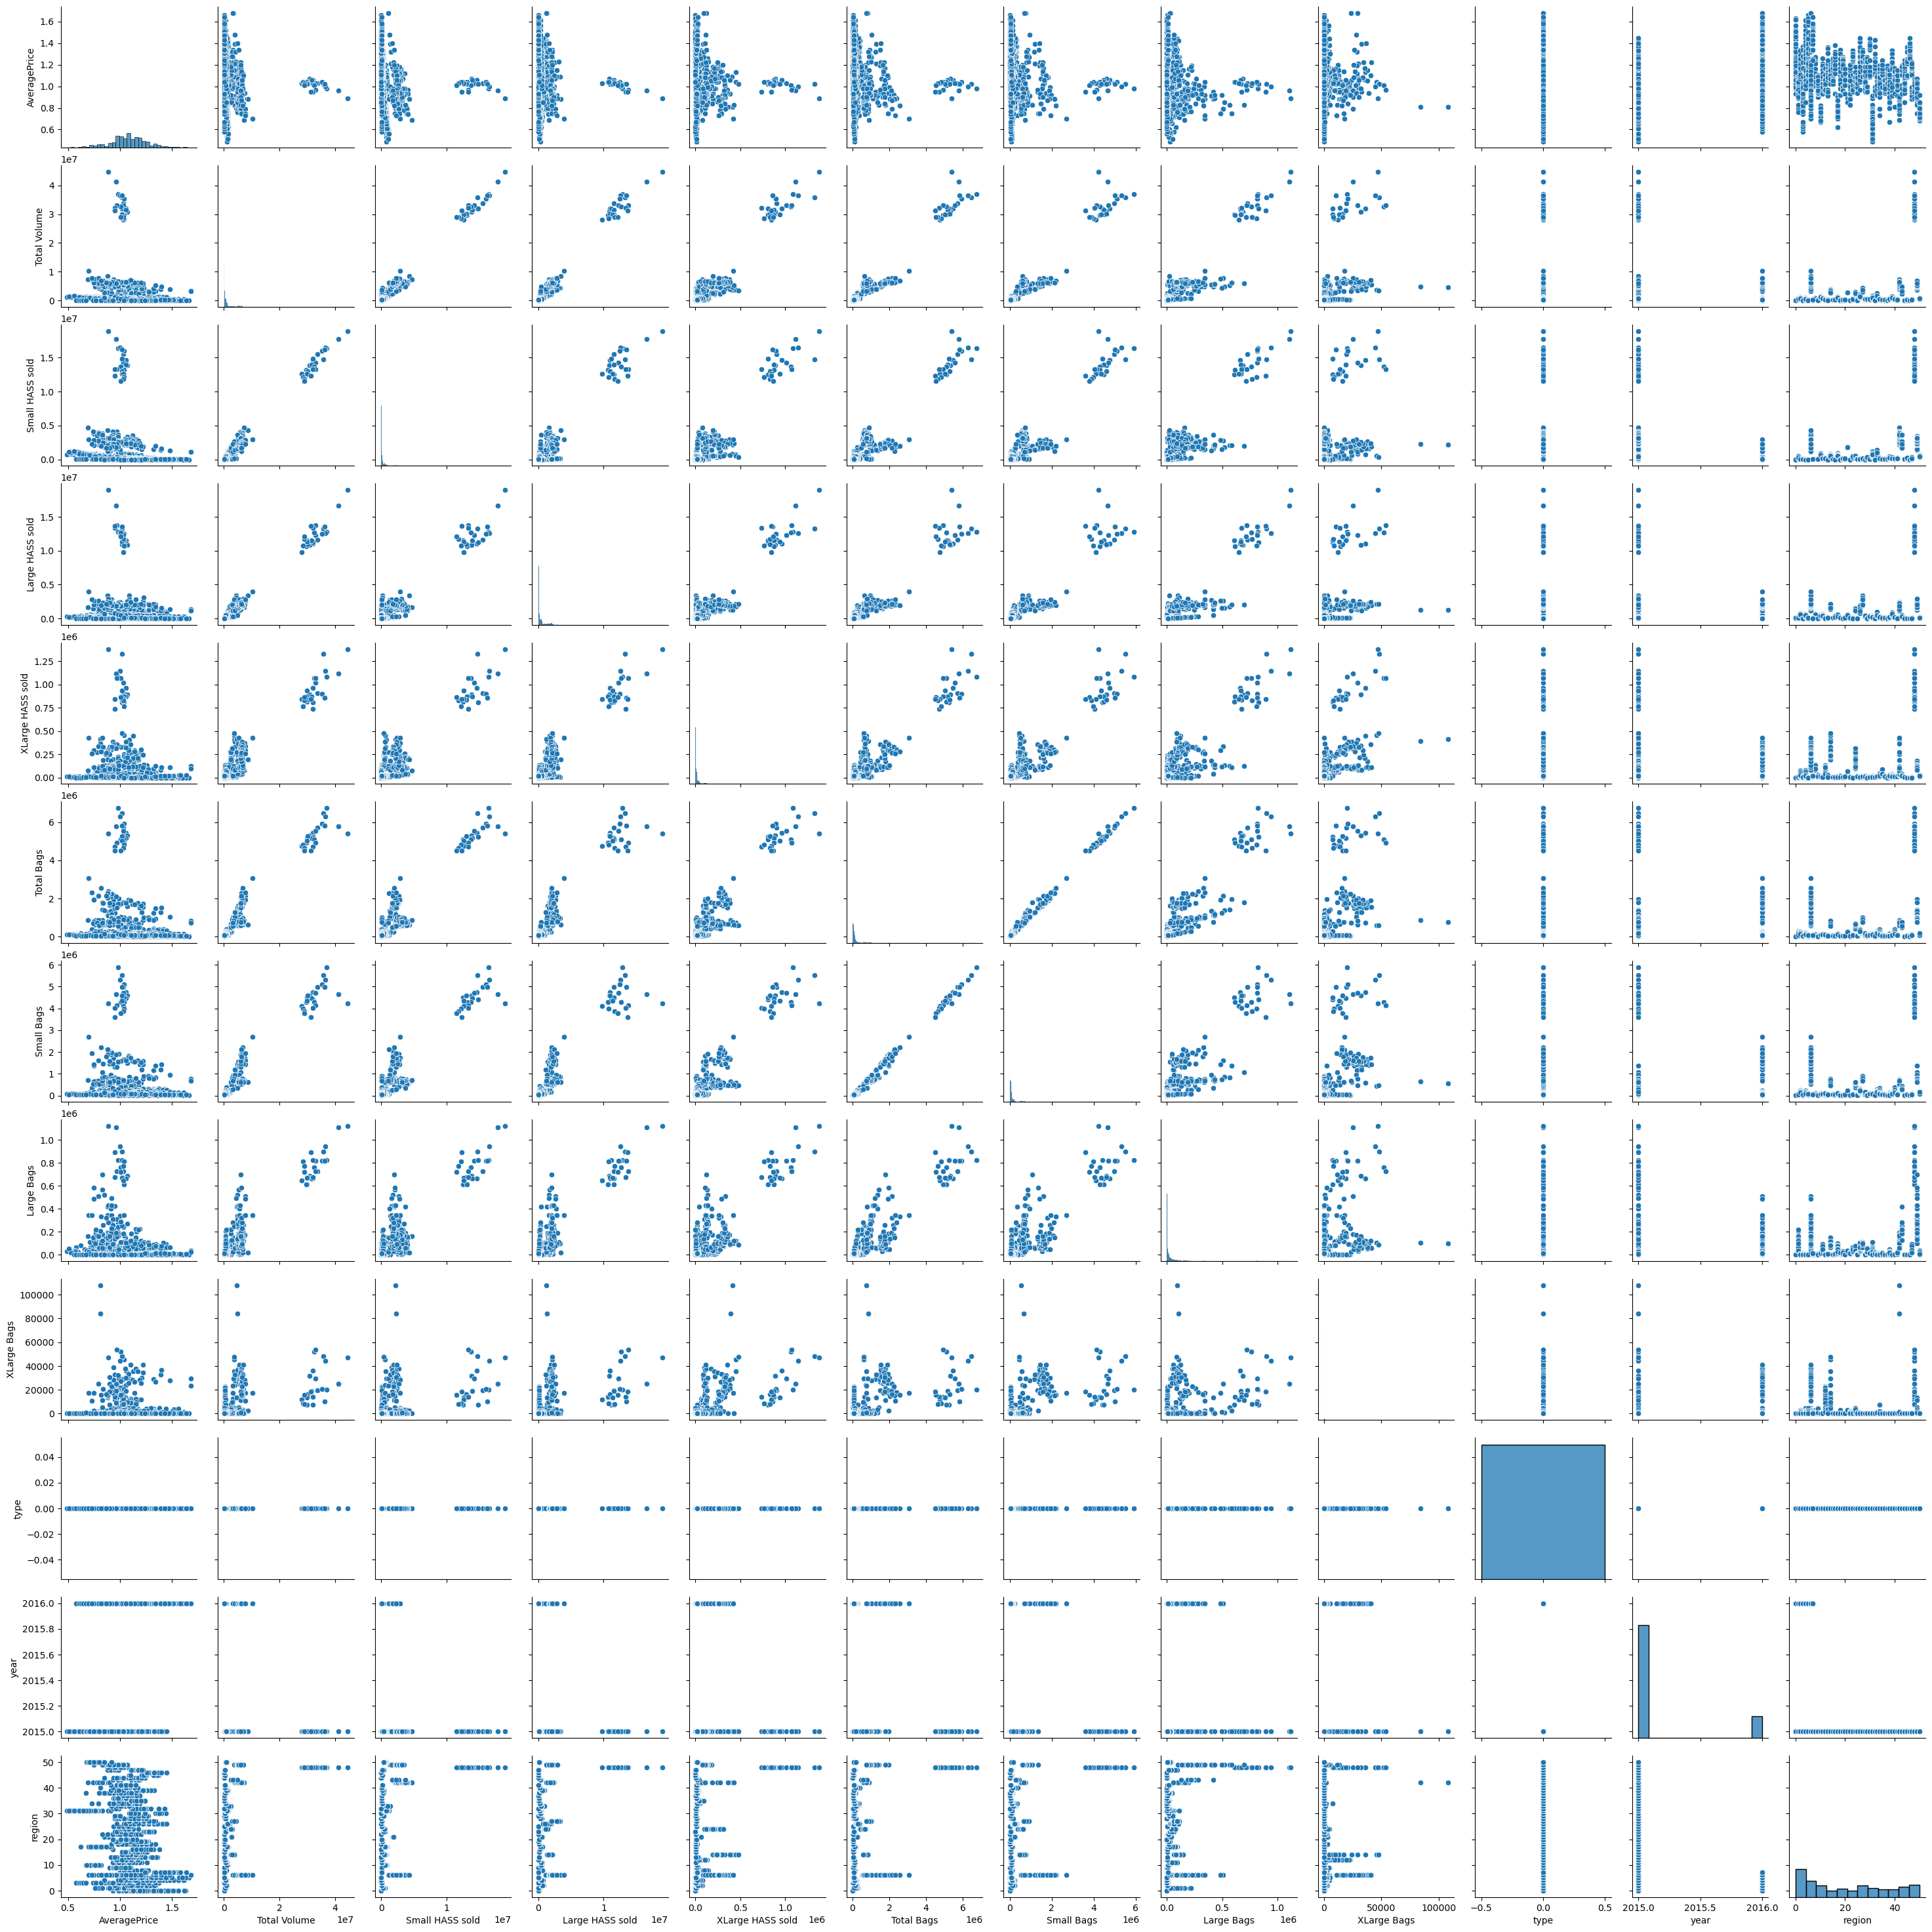

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
df= df.drop(['Date'],axis=1)

# Correlation

In [29]:
# Checking the Correlation with respect to target variable(AveragePrice):-

df.corr()['AveragePrice'].sort_values()

region             -0.229408
Small HASS sold    -0.190096
Large Bags         -0.177480
Total Volume       -0.140470
Total Bags         -0.111597
XLarge HASS sold   -0.100567
Small Bags         -0.097682
Large HASS sold    -0.092084
XLarge Bags        -0.048284
year                0.178683
AveragePrice        1.000000
type                     NaN
Name: AveragePrice, dtype: float64

From the above data, we can observe the following relationships:

Variables such as "region," "Small HASS sold," "Large Bags," "Total Volume," "Total Bags," "XLarge HASS sold," "Small Bags," "Large HASS sold," and "XLarge Bags" have negative correlations with "AveragePrice."
This suggests that as these variables decrease, the average price tends to increase, and vice versa.

The variable "year" has a positive correlation with "AveragePrice," implying that as the year increases, the average price also tends to increase.

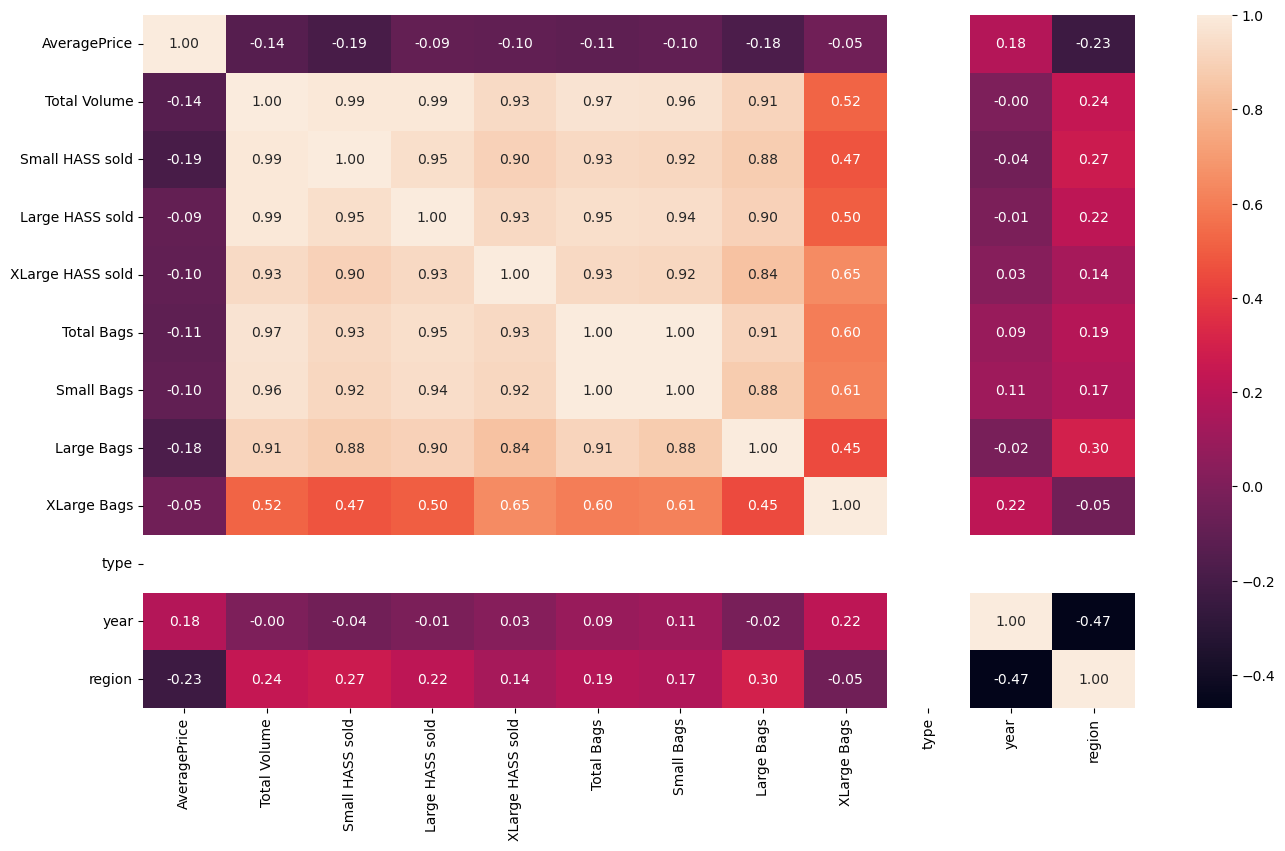

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

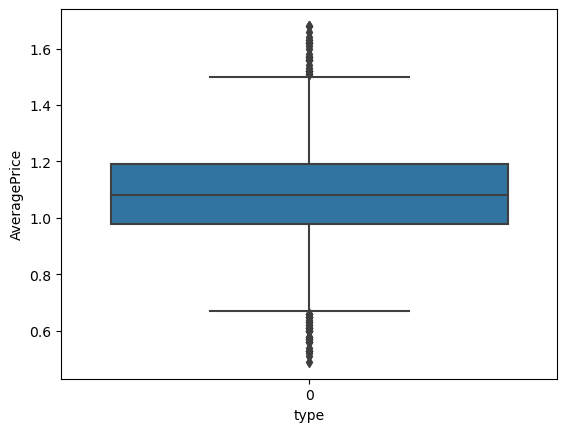

In [31]:
sns.boxplot(x="type", y="AveragePrice", data=df)
plt.show()

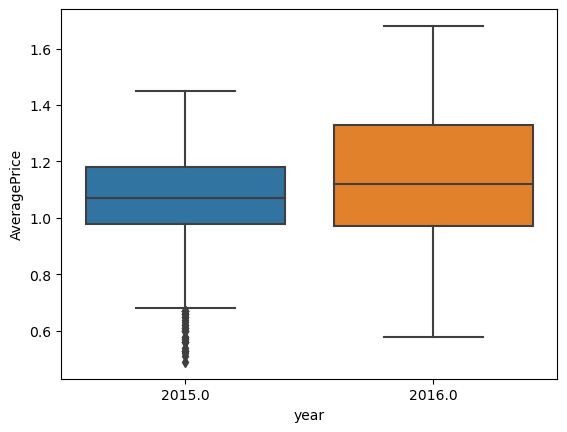

In [32]:
sns.boxplot(x="year", y="AveragePrice", data=df)
plt.show()

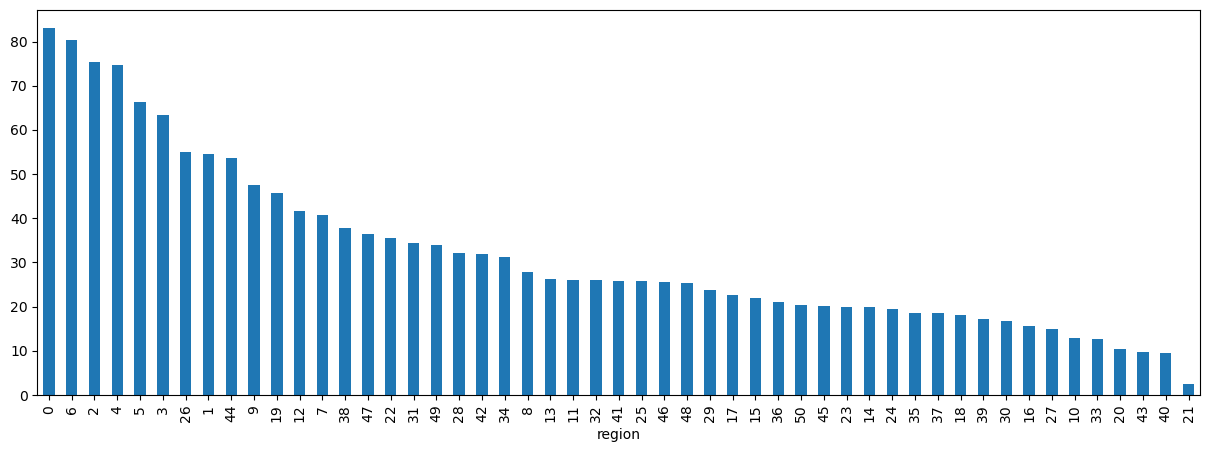

In [33]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.show()

In [34]:
df1=df.drop(['region','year','type'],axis=1)
df1

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [35]:
df1.shape

(1517, 9)

In [36]:
df1.skew()

AveragePrice       -0.109444
Total Volume        6.200138
Small HASS sold     6.051830
Large HASS sold     6.394926
XLarge HASS sold    5.405164
Total Bags          5.366378
Small Bags          5.355185
Large Bags          5.144495
XLarge Bags         5.775077
dtype: float64

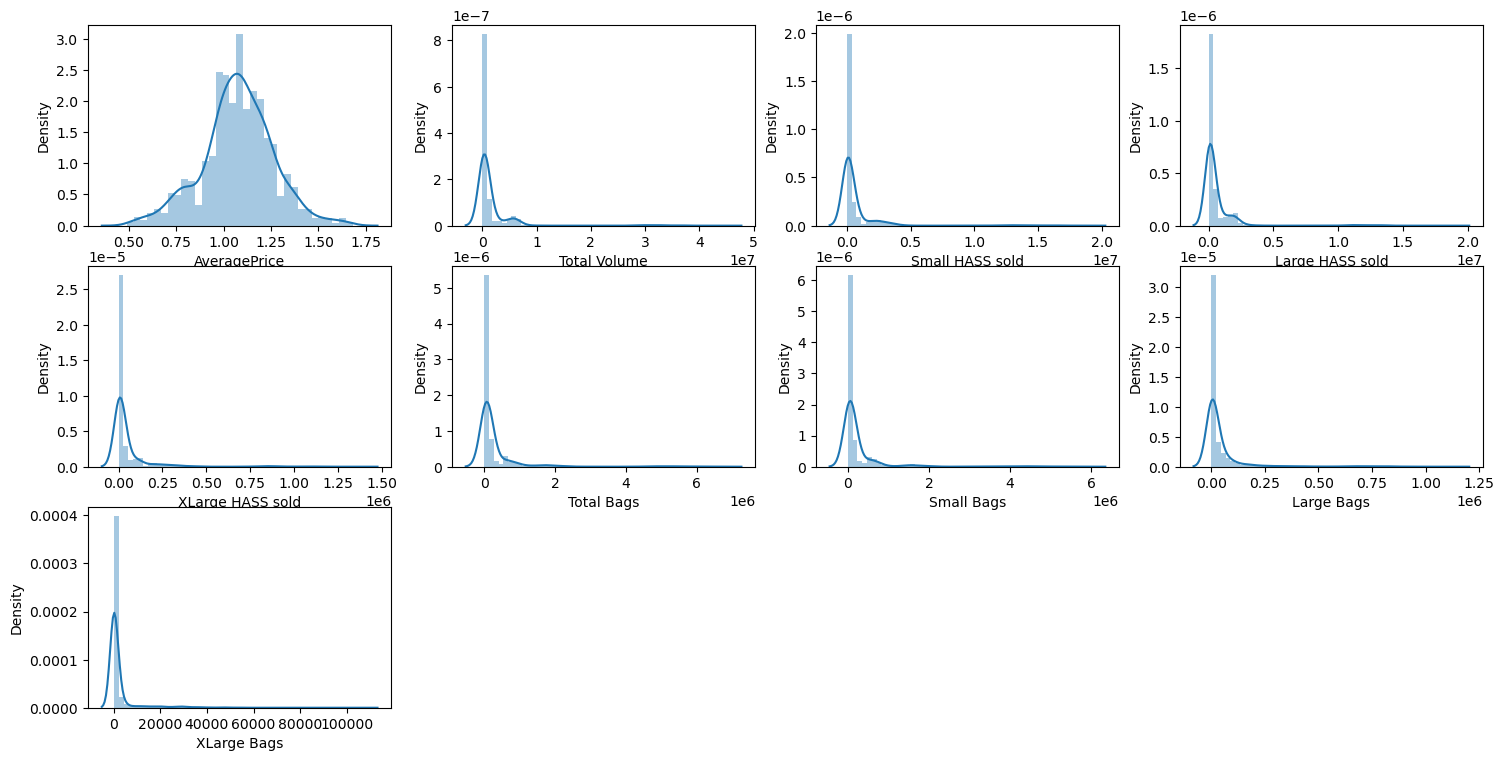

In [37]:
dist=df1.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();

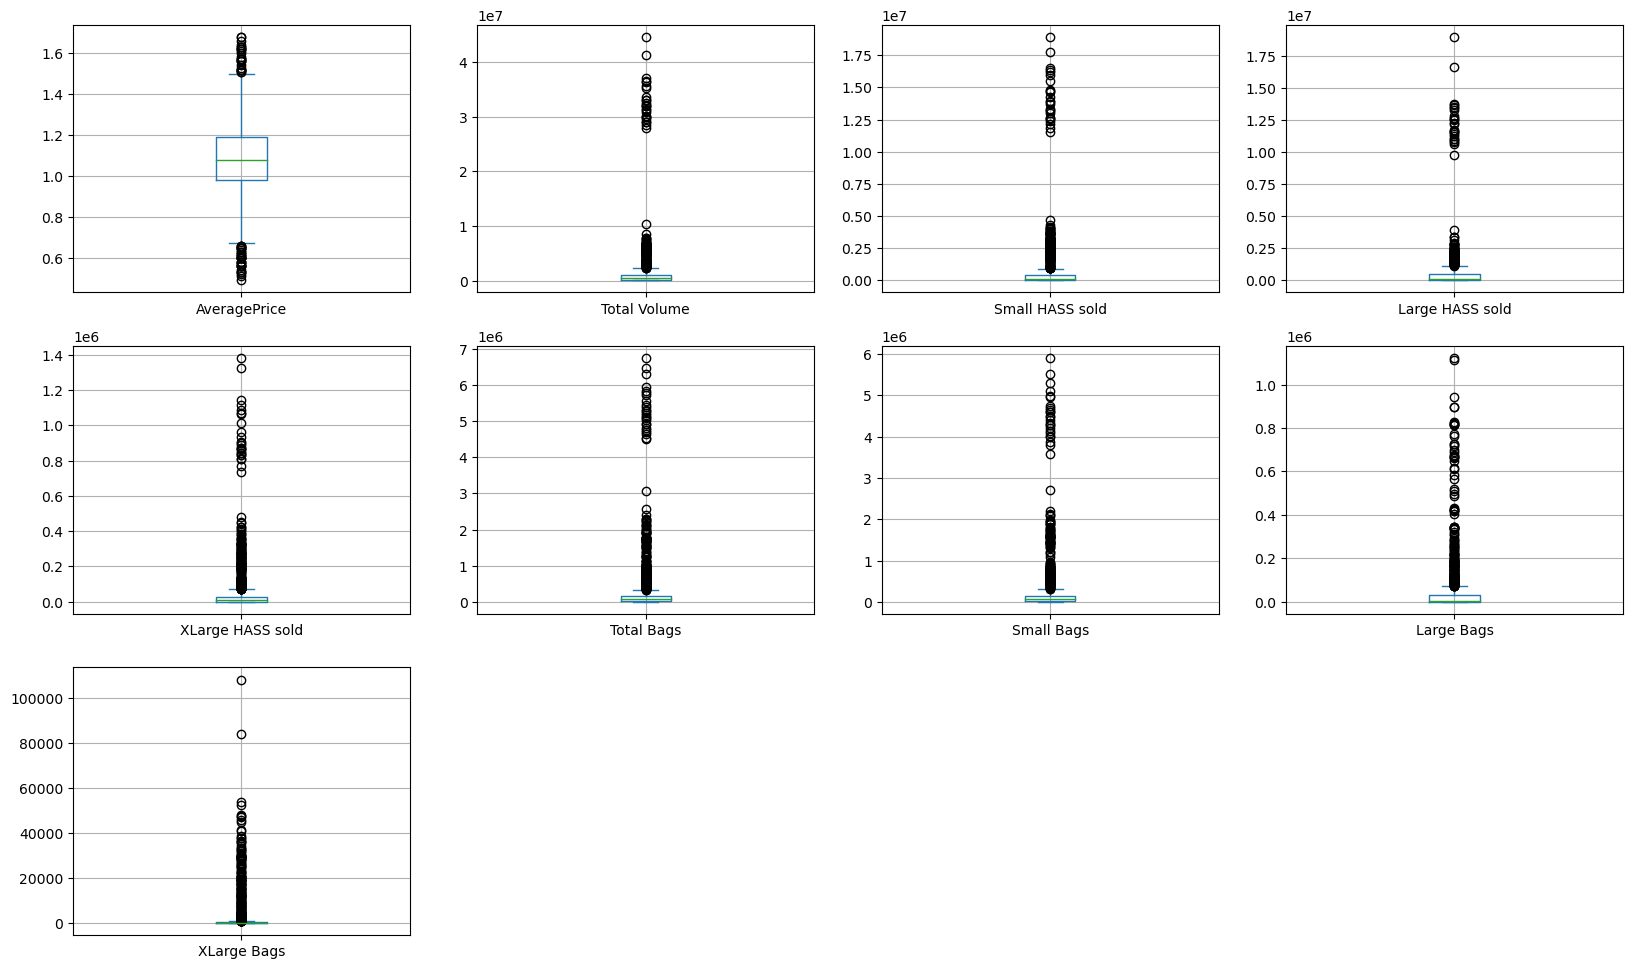

In [38]:
# Outliers Removal:-

df1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727
1,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727
2,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727
3,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727
4,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727
...,...,...,...,...,...,...,...,...,...
1512,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489
1513,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727
1514,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037
1515,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727


In [40]:
# index no.

np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [41]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [42]:
df1.shape

(1517, 9)

In [43]:
df1_new.shape

(1436, 9)

In [44]:
# percentage data loss:-

loss_percent=(1517-1436)/(1517*100)
print(loss_percent,'%')


0.0005339485827290705 %


In [45]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(df1,method='yeo-johnson')
X1

array([[ 1.36732868, -1.59051017, -1.75773609, ..., -1.84758646,
        -1.07217152, -0.88501884],
       [ 1.47842249, -1.76182873, -1.91955712, ..., -1.74842585,
        -1.06246056, -0.88501884],
       [-0.77683119, -0.97503837, -1.8579956 , ..., -1.92354129,
        -1.05008145, -0.88501884],
       ...,
       [ 2.20910554, -0.59977889, -0.23510209, ..., -0.11613719,
         0.20708331,  1.22501607],
       [ 2.15237793, -0.54899704, -0.16955396, ..., -0.08229667,
         0.20796776, -0.88501884],
       [ 1.92633021, -0.57770842, -0.26581784, ..., -0.05714515,
         0.33465765, -0.88501884]])

In [46]:
X1.ndim

2

In [47]:
X1.std()

1.0

In [48]:
X=df1_new.drop(['AveragePrice'],axis=1)
X

,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [49]:
y=df1_new['AveragePrice']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [50]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold',
       'XLarge HASS sold', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Machine Learning Algorithms Training and Testing of AveragePrice

Preprocessing

In [52]:
# Import necessary libraries
import sklearn
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create instances of each model
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svm_model = SVR()

# Perform GridSearchCV for each model
models = {'Random Forest': (rf_model, param_grid_rf),
          'Gradient Boosting': (gb_model, param_grid_gb),
          'Support Vector Machine': (svm_model, param_grid_svm)}

for name, (model, param_grid) in models.items():
    print(f"\nTuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model
    y_pred_train_best = best_model.predict(X_train_scaled)
    y_pred_test_best = best_model.predict(X_test_scaled)
    
    train_rmse_best = mean_squared_error(y_train, y_pred_train_best, squared=False)
    test_rmse_best = mean_squared_error(y_test, y_pred_test_best, squared=False)
    
    print("Best Hyperparameters:", best_params)
    print(f"Train RMSE (Best Model): {train_rmse_best}")
    print(f"Test RMSE (Best Model): {test_rmse_best}")



Tuning hyperparameters for Random Forest...
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Train RMSE (Best Model): 0.03198353125871185
Test RMSE (Best Model): 0.07487351288739406

Tuning hyperparameters for Gradient Boosting...
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}
Train RMSE (Best Model): 0.022203563735818336
Test RMSE (Best Model): 0.07882213151683658

Tuning hyperparameters for Support Vector Machine...
Best Hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Train RMSE (Best Model): 0.08526121110159995
Test RMSE (Best Model): 0.10905068573714496


# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create instances of each model
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svm_model = SVR()

# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV objects
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_gb.fit(X_train_scaled, y_train)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best models
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

# Evaluate the best models
y_pred_train_rf = best_model_rf.predict(X_train_scaled)
y_pred_test_rf = best_model_rf.predict(X_test_scaled)

y_pred_train_gb = best_model_gb.predict(X_train_scaled)
y_pred_test_gb = best_model_gb.predict(X_test_scaled)

y_pred_train_svm = best_model_svm.predict(X_train_scaled)
y_pred_test_svm = best_model_svm.predict(X_test_scaled)

train_rmse_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

train_rmse_gb = mean_squared_error(y_train, y_pred_train_gb, squared=False)
test_rmse_gb = mean_squared_error(y_test, y_pred_test_gb, squared=False)

train_rmse_svm = mean_squared_error(y_train, y_pred_train_svm, squared=False)
test_rmse_svm = mean_squared_error(y_test, y_pred_test_svm, squared=False)

print("Random Forest:")
print("Best Hyperparameters:", best_params_rf)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}")

print("\nGradient Boosting:")
print("Best Hyperparameters:", best_params_gb)
print(f"Train RMSE: {train_rmse_gb}")
print(f"Test RMSE: {test_rmse_gb}")

print("\nSupport Vector Machine:")
print("Best Hyperparameters:", best_params_svm)
print(f"Train RMSE: {train_rmse_svm}")
print(f"Test RMSE: {test_rmse_svm}")


Random Forest:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Train RMSE: 0.03198353125871185
Test RMSE: 0.07487351288739406

Gradient Boosting:
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}
Train RMSE: 0.022203563735818336
Test RMSE: 0.07882213151683658

Support Vector Machine:
Best Hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Train RMSE: 0.08526121110159995
Test RMSE: 0.10905068573714496


# Saving the Model

In [56]:
!pip install joblib

In [57]:
from joblib import dump

# Save the best model
dump(best_model_rf, 'best_model_rf.joblib')

print("Best model (Random Forest) saved successfully!")


Best model (Random Forest) saved successfully!


In [58]:
# Save the best Gradient Boosting model
dump(best_model_gb, 'best_model_gb.joblib')

print("Best model (Gradient Boosting) saved successfully!")


Best model (Gradient Boosting) saved successfully!


In [59]:
# Save the best Support Vector Machine model
dump(best_model_svm, 'best_model_svm.joblib')

print("Best model (Support Vector Machine) saved successfully!")


Best model (Support Vector Machine) saved successfully!
